<a href="https://colab.research.google.com/github/thenaivekid/E-Gunaso/blob/main/E_Gunaso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Semantic sim between paraghraphs

In [14]:
# import tensorflow as tf
# import tensorflow_hub as hub
# from scipy import spatial

# def get_semantic_similarity(paragraph1, paragraph2):
#     # Load the Universal Sentence Encoder
#     embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

#     # Convert paragraphs to embeddings
#     embedding1 = embed([paragraph1])[0].numpy()
#     embedding2 = embed([paragraph2])[0].numpy()

#     # Calculate cosine similarity
#     similarity = 1 - spatial.distance.cosine(embedding1, embedding2)

#     return similarity

# # Example usage
# paragraph1 = "Natural language processing is a field of artificial intelligence."
# paragraph2 = "AI techniques are used in natural language processing tasks."

# similarity_score = get_semantic_similarity(paragraph1, paragraph2)
# print(f"Semantic Similarity Score: {similarity_score}")


2023-12-23 17:28:57.942030: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-23 17:28:58.888924: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 17:28:58.889171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 17:28:59.334545: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-23 17:29:01.073460: I tensorflow/core/platform/cpu_feature_guar

ModuleNotFoundError: No module named 'tensorflow_hub'

In [ ]:
# paragraph3 = "CV is the field of AI that deals with the images and videos."
# print(get_semantic_similarity(paragraph1, paragraph3))

0.3755186200141907


In [ ]:
# string1 = """
# I love Facebook.https://www.facebook.com I wanted an induction cooker and facebook
# just showed me one at just <bold> Rs. 1000 </bold>. They cannot be reading
# my private messages, can they? Wouldn't it violate my right to privacy?"""
# string2 = """
# Natural language processing is a field of artificial intelligence.
# AI techniques are used in natural language processing tasks.
# CV is the field of AI that deals with the images and videos.
# """
# string3 = """I have a fondness for Facebook. I was in search of an induction cooker, and Facebook promptly presented one priced at only Rs. 1000. There's no way they could be going through my private messages, right? That would go against my privacy rights, wouldn't it?"""

# print(get_semantic_similarity(string1,string2))
# print(get_semantic_similarity(string1,string3))

-0.02105778455734253
0.7266676425933838


## Preprocessing

In [16]:
import re


In [19]:
def clean_text(string):
    # Removing URLs
    string = re.sub("http\S+", " ", string.lower())



    # Decontraction
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'s", " is", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\'t", " not", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"\'m", " am", string)

    # Removing Punctuations and numbers
    string = re.sub('[^a-z]+', ' ', string)

    return string
string1 = """
I love Facebook.https://www.facebook.com I wanted an induction cooker and facebook
just showed me one at just <bold> Rs. 1000 </bold>. They cannot be reading
my private messages, can they? Wouldn't it violate my right to privacy?"""
string = clean_text(string1)
print(string)

 i love facebook i wanted an induction cooker and facebook just showed me one at just bold rs bold they cannot be reading my private messages can they would not it violate my right to privacy 


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from nltk.tokenize import word_tokenize

word_tokens = word_tokenize(string)
print(word_tokens)

from nltk.tokenize import sent_tokenize

text = "Is it raining? Do not forget to close the window if it is raining. I hate mopping the floor."

sentence_tokens = sent_tokenize(string)
print(sentence_tokens)

['i', 'love', 'facebook', 'i', 'wanted', 'an', 'induction', 'cooker', 'and', 'facebook', 'just', 'showed', 'me', 'one', 'at', 'just', 'bold', 'rs', 'bold', 'they', 'can', 'not', 'be', 'reading', 'my', 'private', 'messages', 'can', 'they', 'would', 'not', 'it', 'violate', 'my', 'right', 'to', 'privacy']
[' i love facebook i wanted an induction cooker and facebook just showed me one at just bold rs bold they cannot be reading my private messages can they would not it violate my right to privacy']


In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
tokens = ['Formulated', 'and', 'formulating', 'are', 'the', 'two', 'tenses', 'of', 'Formulate']
tokens_stem = [stemmer.stem(token) for token in tokens]

print(tokens_stem)

['formul', 'and', 'formul', 'are', 'the', 'two', 'tens', 'of', 'formul']


In [ ]:
from nltk.stem import WordNetLemmatizer

# Instantiating the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatizing each token in tokens
tokens_lem = [lemmatizer.lemmatize(token.lower(), pos='v') for token in tokens]

print(tokens_lem)

['formulate', 'and', 'formulate', 'be', 'the', 'two', 'tense', 'of', 'formulate']


In [ ]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')
stop_words_removed = [word for word in tokens_lem if word not in eng_stopwords]
stop_words_removed

['formulate', 'formulate', 'two', 'tense', 'formulate']

## dataset spliting

In [ ]:
paragraphs = [
    "This is a positive sentence.",
    "Negative sentiments can be challenging.",
    "I love working with machine learning models.",
    "Errors in the code can be frustrating.",
    "Natural language processing is fascinating.",
    "Debugging is an essential skill in programming.",
    "Positive feedback motivates us to improve.",
    "Dealing with bugs requires patience.",
]

labels = [1, 0, 1, 0, 1, 0, 1, 0]

In [ ]:

from sklearn.model_selection import train_test_split






paragraph_embeddings = []
for paragraph in paragraphs:
    embeddings = [glove[word].numpy() for word in paragraph.split()]
    if embeddings:
        paragraph_embedding = np.mean(embeddings, axis=0)
        paragraph_embeddings.append(paragraph_embedding)

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(paragraph_embeddings, labels, test_size=0.2, random_state=42)
X_train, y_train = paragraph_embeddings, labels
X_test, y_test = paragraph_embeddings, labels

## vectorization

In [ ]:
import torch
import torchtext.vocab as vocab
import numpy as np
glove = vocab.GloVe(name='6B', dim=100)

.vector_cache/glove.6B.zip: 862MB [06:25, 2.24MB/s]                               
100%|█████████▉| 399999/400000 [00:08<00:00, 45225.80it/s]


In [ ]:
words = ['cat', 'dog', 'tree', 'car']

word_embeddings = [glove[word].numpy() for word in words]

for i, word in enumerate(words):
    print(f"{word}: {np.array2string(word_embeddings[i], precision=2, separator=',')}")



cat: [ 0.23, 0.28, 0.63,-0.59,-0.59, 0.63, 0.24,-0.14, 0.06,-0.79,-0.29, 0.14,
  0.72, 0.2 , 0.14, 0.99, 0.53, 0.1 , 0.88, 0.51, 0.4 , 0.21,-0.01,-0.72,
  0.55, 1.15,-0.88,-0.5 ,-0.23, 0.02, 0.11, 0.08, 0.55, 0.58, 0.76, 0.46,
 -0.28, 0.25, 0.69,-0.61, 0.2 , 0.04,-0.31,-0.69,-0.23, 0.46,-0.77, 0.1 ,
  0.56, 0.07,-0.57, 0.24, 0.47, 0.83,-0.29,-1.34,-0.1 , 0.28, 0.42, 0.11,
  0.62, 0.89,-0.23, 0.51, 0.99, 1.18,-0.16, 0.21, 0.74, 0.24,-0.96, 0.13,
 -0.01, 0.33,-0.12, 0.27,-0.41, 0.02,-0.61, 0.41, 0.2 ,-0.42, 0.19,-0.03,
 -0.79,-0.14, 0.04,-0.08, 0.05, 0.24, 0.45,-0.19, 0.46, 0.09,-0.18,-0.02,
 -0.74,-0.15, 0.15,-0.71]
dog: [ 0.31, 0.31, 0.53,-0.93,-0.74, 0.63, 0.44, 0.1 ,-0.09,-0.57,-0.53, 0.2 ,
  0.77,-0.14, 0.14, 1.11, 0.89,-0.18,-0.  , 0.57, 0.59, 0.5 ,-0.29,-1.35,
  0.43, 1.27,-1.16,-0.41, 0.04, 0.55, 0.19, 0.38, 0.58, 0.67, 0.81, 0.94,
 -0.51,-0.07, 0.83,-0.35, 0.21,-0.24,-0.17,-0.78,-0.48, 0.39,-0.86,-0.02,
  0.32,-0.49,-0.07, 0.02,-0.1 , 1.31,-0.12,-1.24,-0.09, 0.35, 0.65, 0.09,
  

## Cosine sim

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(X_test, X_test)

In [ ]:
print(cosine_similarities)

[[1.         0.7852882  0.763198   0.8521397  0.75382936 0.87369215
  0.6699836  0.7124312 ]
 [0.7852882  0.99999976 0.72129476 0.8676375  0.68936086 0.75927603
  0.7252264  0.67664254]
 [0.763198   0.72129476 1.0000001  0.80355966 0.7362871  0.8303437
  0.67870355 0.7888758 ]
 [0.8521397  0.8676375  0.80355966 1.         0.795884   0.8879158
  0.7080269  0.7914605 ]
 [0.75382936 0.68936086 0.7362871  0.795884   1.0000002  0.80611527
  0.565284   0.6888329 ]
 [0.87369215 0.75927603 0.8303437  0.8879158  0.80611527 0.99999994
  0.68031263 0.7568476 ]
 [0.6699836  0.7252264  0.67870355 0.7080269  0.565284   0.68031263
  1.0000001  0.6550213 ]
 [0.7124312  0.67664254 0.7888758  0.7914605  0.6888329  0.7568476
  0.6550213  0.9999999 ]]


## nearest neighbors

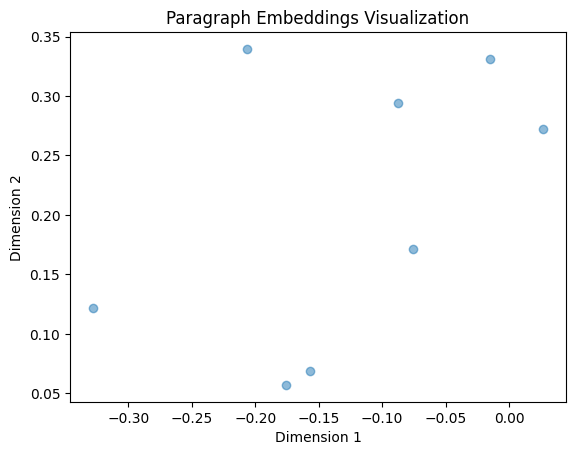

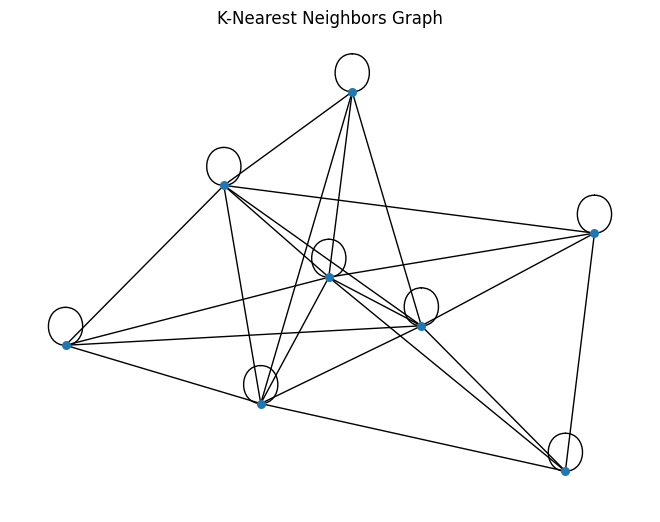

Community 1: [0]
Community 2: [5]
Community 3: [3]
Community 4: [1]
Community 5: [2]
Community 6: [6]
Community 7: [7]
Community 8: [4]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import networkx as nx


plt.scatter([x[0] for x in paragraph_embeddings], [x[1] for x in paragraph_embeddings], alpha=0.5)
plt.title('Paragraph Embeddings Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Find the k nearest neighbors for each paragraph
k_neighbors = 5
knn_model = NearestNeighbors(n_neighbors=k_neighbors, metric='cosine')
knn_model.fit(paragraph_embeddings)
distances, indices = knn_model.kneighbors(paragraph_embeddings)

# Visualize k-nearest neighbors graph
G = nx.Graph()

for i in range(len(paragraph_embeddings)):
    for j in indices[i]:
        G.add_edge(i, j, weight=1 - distances[i][np.where(indices[i] == j)][0])

pos = nx.spring_layout(G)  # You can use other layout algorithms
nx.draw(G, pos, with_labels=False, node_size=30)
plt.title('K-Nearest Neighbors Graph')
plt.show()

# Identify dense regions in the graph using community detection
communities = list(nx.community.label_propagation_communities(G))

# Print paragraphs in each community (dense region)
for idx, community in enumerate(communities):
    print(f"Community {idx + 1}: {list(community)}")


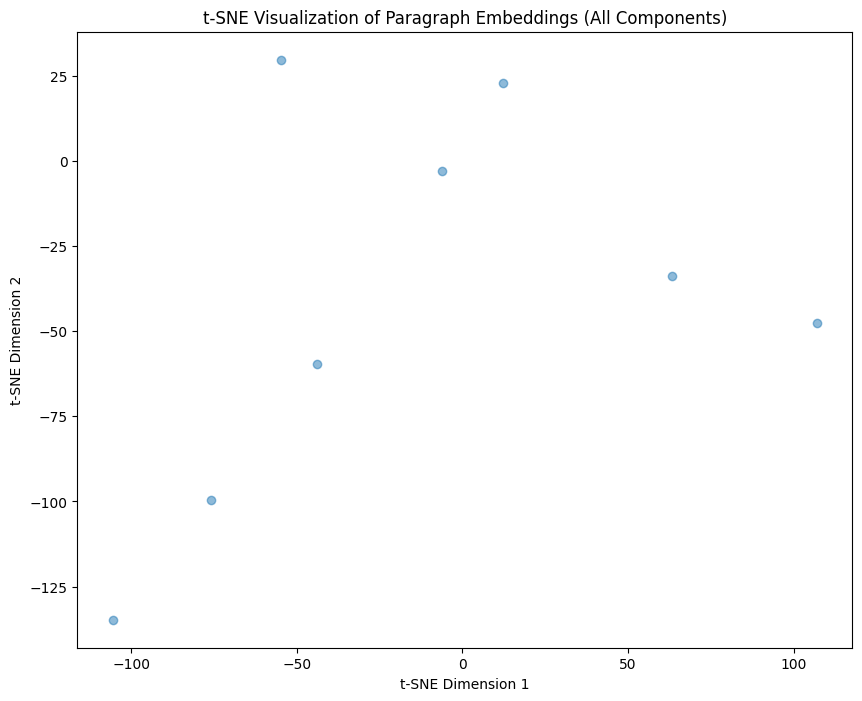

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=1, random_state=42)
embeddings_all = tsne.fit_transform(np.array(paragraph_embeddings))

# Visualize all components
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_all[:, 0], embeddings_all[:, 1], alpha=0.5)
plt.title('t-SNE Visualization of Paragraph Embeddings (All Components)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

## Training classifiers

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


# pinecone

In [21]:
import pinecone
import numpy as np
import os

from dotenv import load_dotenv

load_dotenv()
pinecone_api_key = os.environ.get("PINECONE_API_KEY")
print(pinecone_api_key)
pinecone.init(api_key=pinecone_api_key, environment="gcp-starter")
index_name = 'ashokandsadhana'
index = pinecone.Index(index_name)
words = ["apple", "ball", "cat", "dog", "egg", "frog"]
pinecone.describe_index(index_name)


832c3865-93e3-4c9f-9933-4eaa6db76d86


IndexDescription(name='ashokandsadhana', metric='cosine', replicas=1, dimension=100.0, shards=1, pods=1, pod_type='starter', status={'ready': True, 'state': 'Ready'}, metadata_config=None, source_collection='')

In [22]:
index = pinecone.Index(index_name)
index

In [ ]:
# index.upsert(
#     vectors=list_of_dicts[:1000]
# )

NameError: name 'list_of_dicts' is not defined

In [23]:
index.describe_index_stats()


{'dimension': 100,
 'index_fullness': 0.01,
 'namespaces': {'': {'vector_count': 1000}},
 'total_vector_count': 1000}

In [24]:

list_of_dicts = df.apply(lambda row: {"id": str(row["Unnamed: 0"]), "values": row["encoding"]}, axis=1).tolist()

query = list_of_dicts[69]["values"]

In [30]:
query = [0.26688000559806824, 0.3963199853897095, 0.6169000267982483, -0.7745100259780884, -0.1039000004529953, 0.2669700086116791, 0.27880001068115234, 0.3099200129508972, 0.005468499846756458, -0.08525600284337997, 0.736020028591156, -0.09843199700117111, 0.5479000210762024, -0.03030500002205372, 0.3347899913787842, 0.14093999564647675, -0.0070003001019358635, 0.32569000124931335, 0.22901999950408936, 0.46557000279426575, -0.19530999660491943, 0.37490999698638916, -0.7139000296592712, -0.5177500247955322, 0.770389974117279, 1.0880999565124512, -0.6601099967956543, -0.16234000027179718, 0.911899983882904, 0.21046000719070435, 0.04749400168657303, 1.0018999576568604, 1.1132999658584595, 0.7009400129318237, -0.08696000277996063, 0.4757100045681, 0.16359999775886536, -0.4446899890899658, 0.44690001010894775, -0.9381700158119202, 0.013101000338792801, 0.08596400171518326, -0.674560010433197, 0.4966199994087219, -0.03782700002193451, -0.11038000136613846, -0.2861199975013733, 0.07460600137710571, -0.31527000665664673, -0.09377399832010269, -0.5706899762153625, 0.6686499714851379, 0.4530700147151947, -0.34154000878334045, -0.7166000008583069, -0.7527300119400024, 0.07521200180053711, 0.5790299773216248, -0.11909999698400497, -0.11378999799489975, -0.10025999695062637, 0.7134100198745728, -1.1574000120162964, -0.7402600049972534, 0.4045200049877167, 0.1802300065755844, 0.21448999643325806, 0.37637999653816223, 0.11238999664783478, -0.5363900065422058, -0.025092000141739845, 0.3188599944114685, -0.2501299977302551, -0.632830023765564, -0.0118429996073246, 1.3769999742507935, 0.8601300120353699, 0.20476000010967255, -0.368149995803833, -0.6887400150299072, 0.5351200103759766, -0.4655599892139435, 0.2738899886608124, 0.41179999709129333, -0.8539999723434448, -0.04628799855709076, 0.1130400002002716, -0.2732599973678589, 0.15636000037193298, -0.20333999395370483, 0.535860002040863, 0.5978400111198425, 0.6046900153160095, 0.13734999299049377, 0.42232000827789307, -0.6127899885177612, -0.38486000895500183, 0.3584200143814087, -0.4846400022506714, 0.3072800040245056]
type(query[0])

float

In [31]:
index.query(
  vector=query,
  top_k=5,
  include_values=False
)

{'matches': [{'id': '217', 'score': 0.283802599, 'values': []},
             {'id': '8', 'score': 0.237614095, 'values': []},
             {'id': '840', 'score': 0.215547204, 'values': []},
             {'id': '842', 'score': 0.214266866, 'values': []},
             {'id': '175', 'score': 0.201666728, 'values': []}],
 'namespace': ''}

In [ ]:
df.iloc[90]

Unnamed: 0                                                   90
Grievance     I encountered challenges in obtaining informat...
label                                          foreign_ministry
encoding      [-0.187874451, 0.0543290935, 0.225996926, 0.42...
Name: 90, dtype: object

In [ ]:
df.iloc[123]

Unnamed: 0                                                  123
Grievance     The embassy's lack of support for Nepali citiz...
label                                          foreign_ministry
encoding      [0.00313386694, 0.226090834, 0.0699685961, 0.0...
Name: 123, dtype: object

In [ ]:
import pandas as pd
import re

df = pd.read_csv("data.csv")
df.iloc[0]["encoding"]

'[-0.0592076  -0.08651191  0.2380215  -0.0291435   0.12400154  0.1348278\n -0.23299901  0.42083701  0.06708561  0.01790501  0.04703379  0.07898229\n  0.20935102  0.2006092  -0.04672151 -0.16981159  0.22127374  0.09512107\n -0.2912475   0.1114728  -0.21788609 -0.1269789   0.1728616   0.30507955\n  0.0815272  -0.1774821   0.07350001 -0.413445   -0.09120151  0.0796819\n -0.0681458   0.15893899 -0.24634     0.07643611  0.02882589  0.449852\n  0.0710917  -0.0539907  -0.04364104  0.02522792 -0.521658   -0.2731829\n  0.56512046 -0.43065944  0.07862981  0.0328979  -0.10062462 -0.14309071\n  0.166999   -0.44916672  0.3454998  -0.10947599  0.20323026  0.794272\n  0.0053078  -1.5401905   0.0163311  -0.43596584  1.86723     0.5267387\n -0.15958203  0.39608702 -0.10698501 -0.2570583   0.6786782   0.13641399\n -0.256068    0.19694331  0.09937792 -0.1767036  -0.32318398 -0.21189447\n -0.2152931  -0.3755292   0.409499    0.4548266  -0.2204288  -0.00689411\n -0.965182   -0.23369348  0.719737   -0.12711

In [ ]:
pattern = re.compile(r"[]\[\n]")

def to_list(string):
    x1 = re.sub(pattern, "", string)
    x1 = x1.split()
    x1 = [float(i) for i in x1]
    return x1

In [ ]:
x = '[-0.0592076  -0.08651191  0.2380215  -0.0291435   0.12400154  0.1348278\n -0.23299901  0.42083701  0.06708561  0.01790501  0.04703379  0.07898229\n  0.20935102  0.2006092  -0.04672151 -0.16981159  0.22127374  0.09512107\n -0.2912475   0.1114728  -0.21788609 -0.1269789   0.1728616   0.30507955\n  0.0815272  -0.1774821   0.07350001 -0.413445   -0.09120151  0.0796819\n -0.0681458   0.15893899 -0.24634     0.07643611  0.02882589  0.449852\n  0.0710917  -0.0539907  -0.04364104  0.02522792 -0.521658   -0.2731829\n  0.56512046 -0.43065944  0.07862981  0.0328979  -0.10062462 -0.14309071\n  0.166999   -0.44916672  0.3454998  -0.10947599  0.20323026  0.794272\n  0.0053078  -1.5401905   0.0163311  -0.43596584  1.86723     0.5267387\n -0.15958203  0.39608702 -0.10698501 -0.2570583   0.6786782   0.13641399\n -0.256068    0.19694331  0.09937792 -0.1767036  -0.32318398 -0.21189447\n -0.2152931  -0.3755292   0.409499    0.4548266  -0.2204288  -0.00689411\n -0.965182   -0.23369348  0.719737   -0.1271112  -0.00793491  0.0904623\n -1.171078    0.0799803   0.38000202 -0.055475   -0.2982302  -0.30860138\n  0.08469181  0.1338483   0.0446027  -0.2641769  -0.271234    0.23989299\n  0.14086299  0.00616349  0.50876606 -0.15295   ]'
pattern = re.compile(r"[]\[\n]")
x1 = re.sub(pattern, "", x)
x1 = x1.split()
x1 = [float(i) for i in x1]
len(x1)

100

In [ ]:
df.iloc[0]["Unnamed: 0"]

0

In [ ]:

list_of_dicts = df.apply(lambda row: {"id": str(row["Unnamed: 0"]), "values": row["encoding"]}, axis=1).tolist()

query = list_of_dicts[90]["values"]